### Table of Contents

### 1. Importing your libraries and data
### 2. Subsetting, wrangling, and cleaning time-series data
### 3. Time-series analysis: decomposition
### 4. Testing for stationarity
### 5. Stationarizing the Data


### 1. Importing your libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# Create a project folder string

path = r'/Users/nora/Desktop/CareerFoundry Achievement 6'

In [3]:
# Import the data set

df_calendar = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'calendar.csv'))

In [4]:
df_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,39593,2020-11-03,f,$79.00,$79.00,30.0,270.0
1,2595,2020-11-03,f,$175.00,$175.00,3.0,1125.0
2,2595,2020-11-04,f,$175.00,$175.00,3.0,1125.0
3,2595,2020-11-05,f,$175.00,$175.00,3.0,1125.0
4,2595,2020-11-06,f,$175.00,$175.00,3.0,1125.0


#### The data I sourced is not from Quandl, but from the same source where I found my other Airbnb data set. This data set contains information about Airbnb listings from November 2020 to November 2021. 

In [5]:
pd.set_option('display.max_rows', None)

df_calendar['date'].value_counts().sort_index()

2020-11-02     8666
2020-11-03    44488
2020-11-04    44488
2020-11-05    44489
2020-11-06    44489
2020-11-07    44489
2020-11-08    44489
2020-11-09    44489
2020-11-10    44489
2020-11-11    44489
2020-11-12    44489
2020-11-13    44489
2020-11-14    44489
2020-11-15    44489
2020-11-16    44489
2020-11-17    44489
2020-11-18    44489
2020-11-19    44489
2020-11-20    44489
2020-11-21    44489
2020-11-22    44489
2020-11-23    44489
2020-11-24    44489
2020-11-25    44489
2020-11-26    44489
2020-11-27    44489
2020-11-28    44489
2020-11-29    44489
2020-11-30    44489
2020-12-01    44489
2020-12-02    44489
2020-12-03    44489
2020-12-04    44489
2020-12-05    44489
2020-12-06    44489
2020-12-07    44489
2020-12-08    44489
2020-12-09    44489
2020-12-10    44489
2020-12-11    44489
2020-12-12    44489
2020-12-13    44489
2020-12-14    44489
2020-12-15    44489
2020-12-16    44489
2020-12-17    44489
2020-12-18    44489
2020-12-19    44489
2020-12-20    44489
2020-12-21    44489


### 2. Subsetting, wrangling, and cleaning time-series data

In [6]:
data_sub = df_calendar.loc[(df_calendar['date'] >= '2020-11-03') & (df_calendar['date'] < '2021-11-02')]

#### I excluded the last two dates from the data set, because they only had one obersvation. I also excluded the first date. All the other dates have the same number of obervations. 

In [7]:
data_sub['date'].value_counts().sort_index()

2020-11-03    44488
2020-11-04    44488
2020-11-05    44489
2020-11-06    44489
2020-11-07    44489
2020-11-08    44489
2020-11-09    44489
2020-11-10    44489
2020-11-11    44489
2020-11-12    44489
2020-11-13    44489
2020-11-14    44489
2020-11-15    44489
2020-11-16    44489
2020-11-17    44489
2020-11-18    44489
2020-11-19    44489
2020-11-20    44489
2020-11-21    44489
2020-11-22    44489
2020-11-23    44489
2020-11-24    44489
2020-11-25    44489
2020-11-26    44489
2020-11-27    44489
2020-11-28    44489
2020-11-29    44489
2020-11-30    44489
2020-12-01    44489
2020-12-02    44489
2020-12-03    44489
2020-12-04    44489
2020-12-05    44489
2020-12-06    44489
2020-12-07    44489
2020-12-08    44489
2020-12-09    44489
2020-12-10    44489
2020-12-11    44489
2020-12-12    44489
2020-12-13    44489
2020-12-14    44489
2020-12-15    44489
2020-12-16    44489
2020-12-17    44489
2020-12-18    44489
2020-12-19    44489
2020-12-20    44489
2020-12-21    44489
2020-12-22    44489


In [8]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights
datetime,,,,,,
2020-11-03,39593,f,$79.00,$79.00,30.0,270.0
2020-11-03,2595,f,$175.00,$175.00,3.0,1125.0
2020-11-04,2595,f,$175.00,$175.00,3.0,1125.0
2020-11-05,2595,f,$175.00,$175.00,3.0,1125.0
2020-11-06,2595,f,$175.00,$175.00,3.0,1125.0


In [9]:
# Remove $ sign from price column so we can make calculations 

def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

In [10]:
data_sub['price'] = data_sub['price'].apply(clean_currency).astype('float')

In [11]:
data_sub.head()

,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights
datetime,,,,,,
2020-11-03,39593,f,79.0,$79.00,30.0,270.0
2020-11-03,2595,f,175.0,$175.00,3.0,1125.0
2020-11-04,2595,f,175.0,$175.00,3.0,1125.0
2020-11-05,2595,f,175.0,$175.00,3.0,1125.0
2020-11-06,2595,f,175.0,$175.00,3.0,1125.0


In [12]:
# Group data by date 

mean_price = data_sub.groupby('datetime').agg({'price': ['mean']})

In [13]:
mean_price

,price
,mean
datetime,
2020-11-03,148.391530
2020-11-04,148.408501
2020-11-05,148.577886
2020-11-06,151.934859
2020-11-07,152.091171
2020-11-08,148.700436
2020-11-09,148.472802
2020-11-10,148.571660


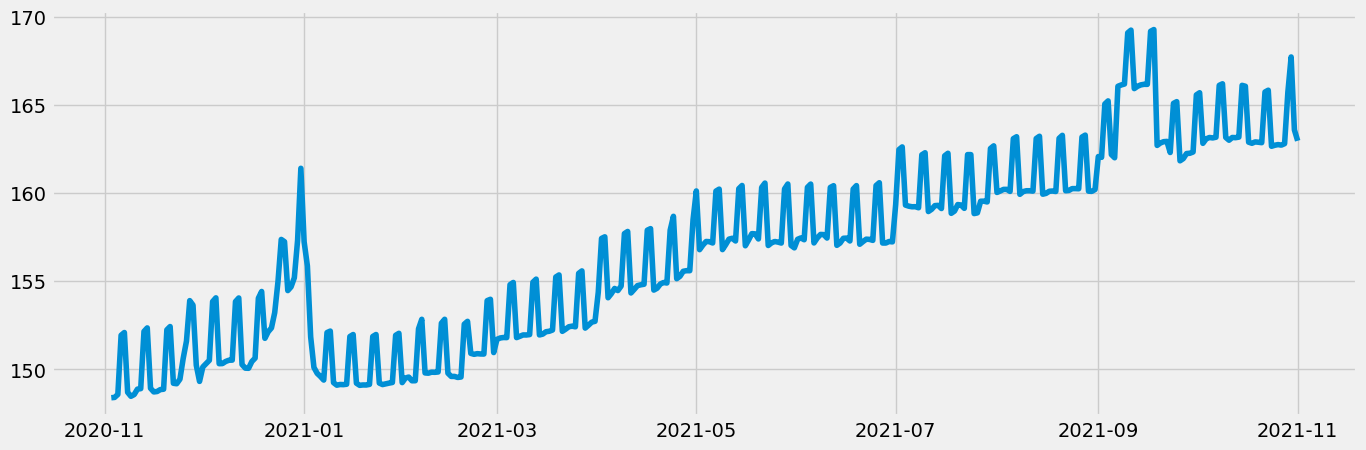

In [14]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(mean_price)

### 3. Time-series analysis: decomposition

In [15]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(mean_price, model='additive')

In [16]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

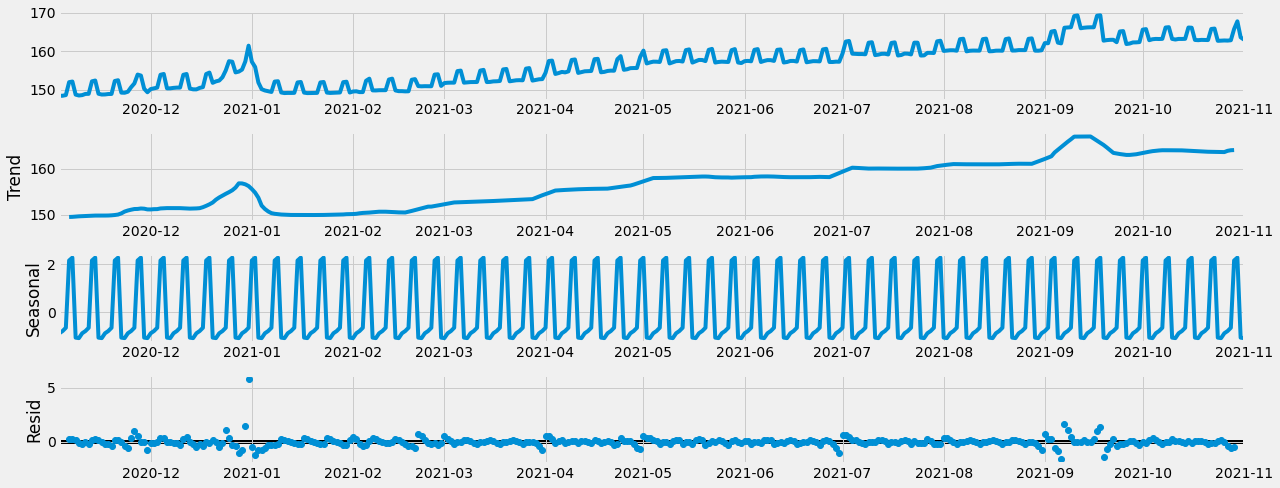

In [17]:
# Plot the separate components

decomposition.plot()
plt.show()

#### The data has a dominant upward trend. The level and trend differ quite a bit due to noise in the data. The data has fluctuations at regular intervals, i.e. seasonality. There is a lot of unexplained noise in the data. 

### 4. Testing for stationarity

In [18]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(mean_price)

Dickey-Fuller Stationarity test:
Test Statistic                  -0.700156
p-value                          0.846709
Number of Lags Used             17.000000
Number of Observations Used    346.000000
Critical Value (1%)             -3.449392
Critical Value (5%)             -2.869930
Critical Value (10%)            -2.571240
dtype: float64


#### H0: There is a unit root (non-stationary data)  
#### H1: There is no unit root (stationary data)

#### The test statistic (-0.700156) is larger than the critical value (-2.869930), which means that I can't reject the null hypothesis. 

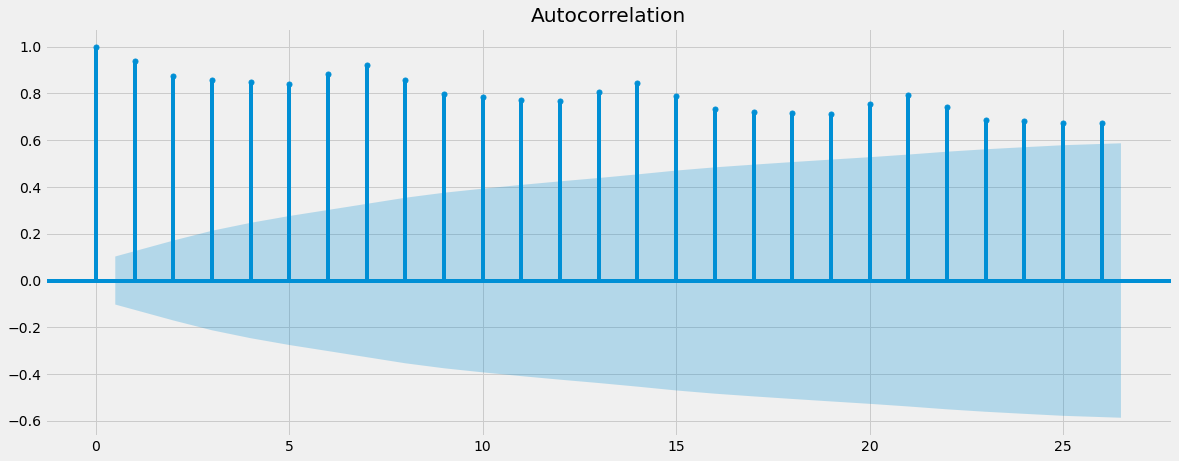

In [19]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(mean_price)
plt.show()

### 5. Stationarizing the Data

### Round #1

In [20]:
data_diff = mean_price - mean_price.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [21]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [22]:
data_diff.head()

,price
,mean
datetime,
2020-11-04,0.016971
2020-11-05,0.169385
2020-11-06,3.356973
2020-11-07,0.156312
2020-11-08,-3.390735


In [23]:
data_diff.columns

MultiIndex([('price', 'mean')],
           )

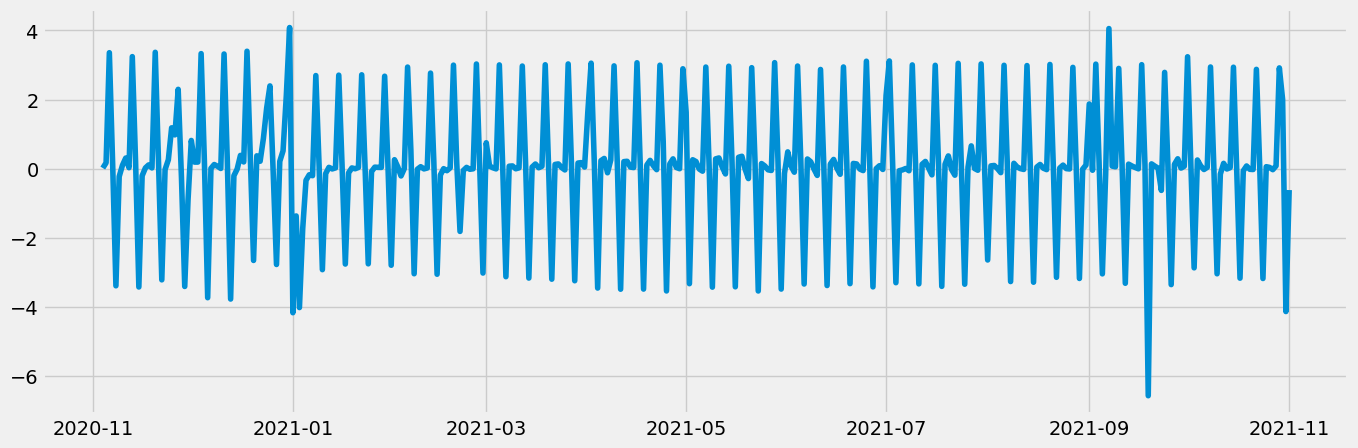

In [24]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [25]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -6.480398e+00
p-value                        1.299370e-08
Number of Lags Used            1.700000e+01
Number of Observations Used    3.450000e+02
Critical Value (1%)           -3.449447e+00
Critical Value (5%)           -2.869954e+00
Critical Value (10%)          -2.571253e+00
dtype: float64


#### H0: There is a unit root (non-stationary data)  
#### H1: There is no unit root (stationary data)
#### The test statistic is now smaller than the critical value, which means I can reject the null hypothesis. 

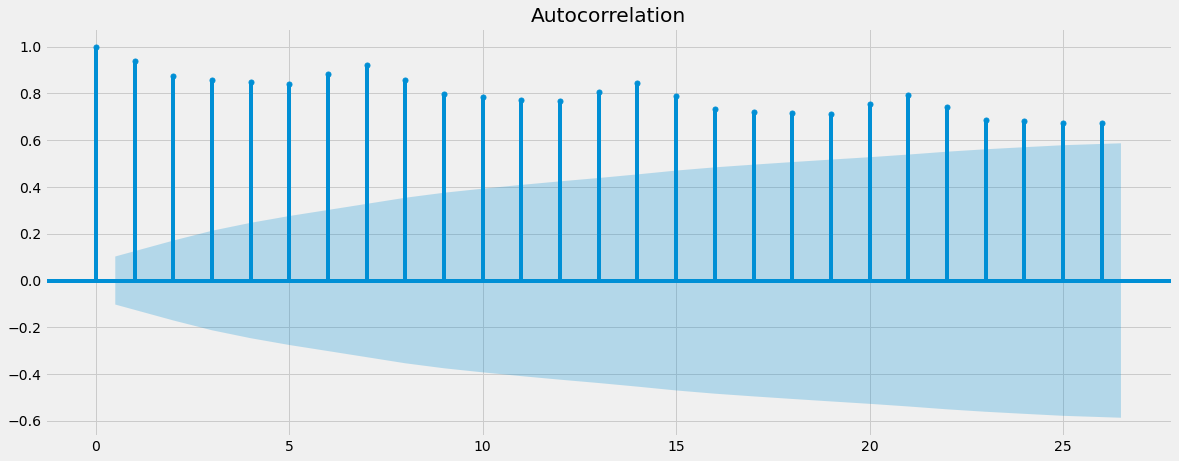

In [26]:
plot_acf(mean_price)
plt.show()

#### All the terms are still autocorrelated. This means that, despite the Dickey-Fuller test saying that the data is stationary, that stationarity is weak. Therefore, I need to conduct another round of differencing to stationarize the data further and reduce the autocorrelated terms.

### Round #2

In [27]:
data_diff2 = data_diff - data_diff.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole

In [28]:
data_diff2.dropna(inplace = True)

In [29]:
data_diff2.head()

,price
,mean
datetime,
2020-11-05,0.152414
2020-11-06,3.187588
2020-11-07,-3.200661
2020-11-08,-3.547046
2020-11-09,3.163100


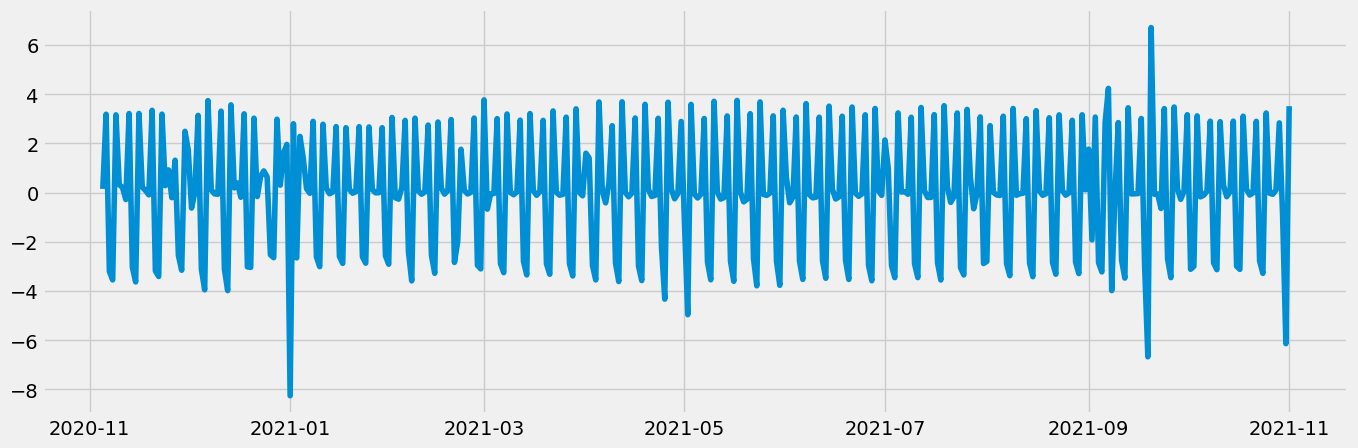

In [30]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff2)

In [32]:
dickey_fuller(data_diff2)

Dickey-Fuller Stationarity test:
Test Statistic                -9.002865e+00
p-value                        6.427080e-15
Number of Lags Used            1.300000e+01
Number of Observations Used    3.480000e+02
Critical Value (1%)           -3.449282e+00
Critical Value (5%)           -2.869881e+00
Critical Value (10%)          -2.571214e+00
dtype: float64


#### H0: There is a unit root (non-stationary data)  
#### H1: There is no unit root (stationary data)
#### The test statistic is smaller than the critical value, which means I can reject the null hypothesis. 

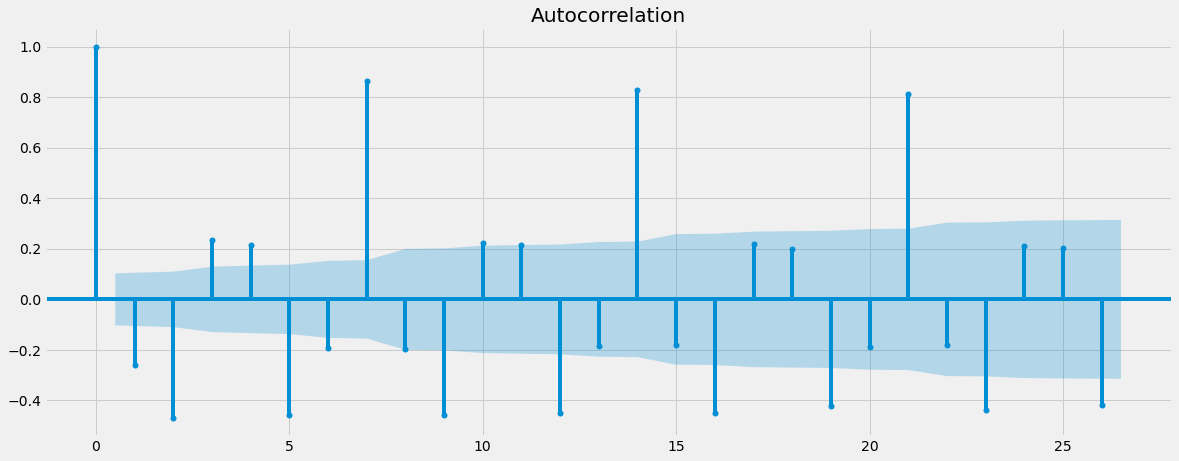

In [31]:
plot_acf(data_diff2)
plt.show()

#### The autocorrelation has improved, but the number of autocorrelated terms is still above 10.